In [1]:
import pandas as pd
import numpy as np
import pickle
from collections import Counter, defaultdict
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
harvard = pd.read_csv("../data/cat_df.csv")
harvard = harvard.drop("Unnamed: 0", axis=1)
BB_Song = pd.read_csv("../data/hot_stuff_with_time.csv")
BB_Song = BB_Song.drop("Unnamed: 0", axis=1)

In [42]:
harvard.head()

,song,artist,Positive,Negative,Time,Human,Object,Knowledge,Number,Communication,Place,Government,word_count
0,sauce it up,lil uzi vert,2.0,10.0,1.0,5.0,2.0,0.0,13.0,0.0,0.0,0.0,33.0
1,backroad song,granger smith,7.0,0.0,13.0,1.0,7.0,0.0,1.0,10.0,4.0,0.0,43.0
2,feelin' satisfied,boston,0.0,1.0,2.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,6.0
3,saturday morning confusion,bobby russell,2.0,9.0,20.0,12.5,7.0,1.0,5.0,1.0,2.0,0.0,59.5
4,country man,luke bryan,1.0,1.0,1.0,5.0,4.0,0.0,4.0,0.0,2.0,0.0,18.0


In [43]:
BB_Song.head()

,name,artist,release,peak,duration,SemiYearID,WeekID,QuarterID
0,don't you worry child,swedish house mafia featuring john martin,2012.750000,6,33,2012.5,2012-10-06,2012.75
1,don't you worry,don gardner and dee dee ford,1962.583333,66,7,1962.5,1962-08-25,1962.50
2,don't you write her off,"mcguinn, clark & hillman",1979.166667,33,11,1979.0,1979-03-17,1979.00
3,don't,billy currington,2008.833333,52,20,2008.5,2008-11-08,2008.75
4,don't,bryson tiller,2015.750000,13,34,2015.5,2015-10-17,2015.75


In [44]:
harvard_BB = pd.DataFrame(harvard.merge(BB_Song, left_on=["song", "artist"], right_on=["name", "artist"], how="inner")).reset_index(drop=True)

In [51]:
harvard_BB.shape

(22711, 20)

In [52]:
harvard_BB.head()

,song,artist,Positive,Negative,Time,Human,Object,Knowledge,Number,Communication,Place,Government,word_count,name,release,peak,duration,SemiYearID,WeekID,QuarterID
0,sauce it up,lil uzi vert,2.0,10.0,1.0,5.0,2.0,0.0,13.0,0.0,0.0,0.0,33.0,sauce it up,2017.666667,49,15,2017.5,2017-09-16,2017.50
1,backroad song,granger smith,7.0,0.0,13.0,1.0,7.0,0.0,1.0,10.0,4.0,0.0,43.0,backroad song,2015.916667,49,16,2015.5,2015-12-26,2015.75
2,feelin' satisfied,boston,0.0,1.0,2.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,6.0,feelin' satisfied,1979.166667,46,7,1979.0,1979-03-24,1979.00
3,saturday morning confusion,bobby russell,2.0,9.0,20.0,12.5,7.0,1.0,5.0,1.0,2.0,0.0,59.5,saturday morning confusion,1971.500000,28,14,1971.0,1971-07-10,1971.50
4,country man,luke bryan,1.0,1.0,1.0,5.0,4.0,0.0,4.0,0.0,2.0,0.0,18.0,country man,2008.666667,74,9,2008.5,2008-09-20,2008.50


In [53]:
categories = [i for i in harvard.columns.tolist() if i != "song" and i != "artist"]

In [54]:
harvard_BB_SemiYear = pd.DataFrame(harvard_BB.groupby("SemiYearID").sum()[[i for i in harvard.columns.tolist() if i != "song" and i != "artist"]]).reset_index()

In [55]:
harvard_BB_Quarter = pd.DataFrame(harvard_BB.groupby("QuarterID").sum()[[i for i in harvard.columns.tolist() if i != "song" and i != "artist"]]).reset_index()

In [56]:
for k in categories:
    harvard_BB_SemiYear[k] = [i/j for i, j in zip(harvard_BB_SemiYear[k], harvard_BB_SemiYear["word_count"])]

In [57]:
for k in categories:
    harvard_BB_Quarter[k] = [i/j for i, j in zip(harvard_BB_Quarter[k], harvard_BB_Quarter["word_count"])]

In [64]:
harvard_BB_SemiYear.head()

,SemiYearID,Positive,Negative,Time,Human,Object,Knowledge,Number,Communication,Place,Government,word_count
0,1958.5,0.186894,0.134240,0.119413,0.167438,0.112108,0.023145,0.148199,0.025170,0.080790,0.002604,1.0
1,1959.0,0.184486,0.106169,0.153309,0.134686,0.123462,0.029348,0.133854,0.017210,0.106003,0.011473,1.0
2,1959.5,0.221002,0.109503,0.111399,0.147534,0.117489,0.027550,0.152525,0.029347,0.072270,0.011380,1.0
3,1960.0,0.224201,0.134059,0.092236,0.142019,0.097752,0.025834,0.168133,0.013406,0.091049,0.011311,1.0
4,1960.5,0.204740,0.113856,0.140565,0.164175,0.087785,0.021878,0.141294,0.018596,0.089243,0.017867,1.0


In [63]:
harvard_BB_Quarter.head()

,QuarterID,Positive,Negative,Time,Human,Object,Knowledge,Number,Communication,Place,Government,word_count
0,1958.50,0.210085,0.149057,0.116015,0.157441,0.097645,0.019480,0.132536,0.028110,0.086672,0.002959,1.0
1,1958.75,0.153981,0.113211,0.124234,0.181627,0.132633,0.028346,0.170429,0.020997,0.072441,0.002100,1.0
2,1959.00,0.200298,0.104714,0.159307,0.145333,0.143469,0.029625,0.104341,0.011179,0.093907,0.007826,1.0
3,1959.25,0.182683,0.109570,0.164454,0.110561,0.100059,0.032495,0.146225,0.019616,0.116505,0.017832,1.0
4,1959.50,0.181687,0.092430,0.099928,0.177073,0.125739,0.032012,0.176784,0.027686,0.079740,0.006921,1.0


In [65]:
harvard_BB_SemiYear = harvard_BB_SemiYear.drop("word_count", axis=1)
harvard_BB_Quarter = harvard_BB_Quarter.drop("word_count", axis=1)

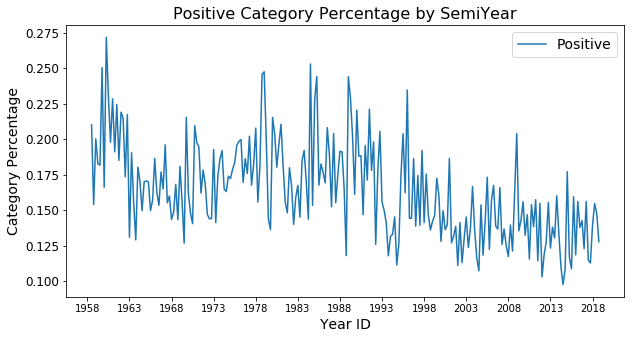

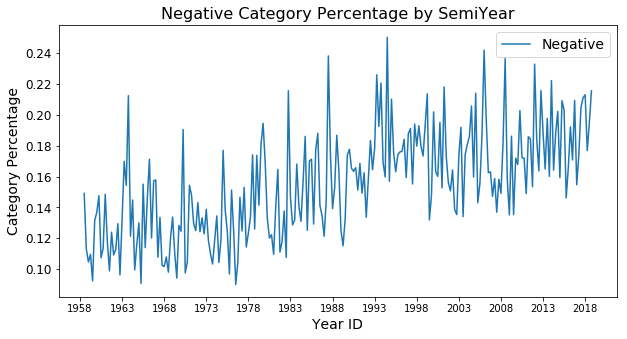

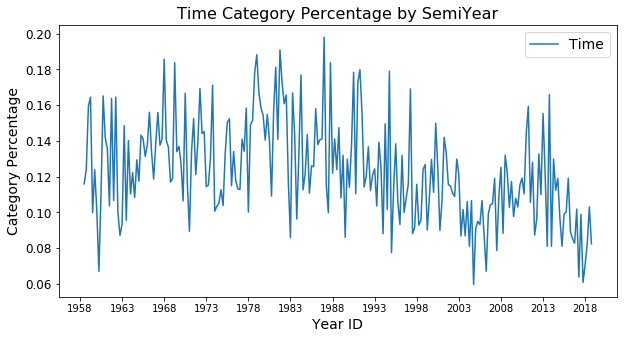

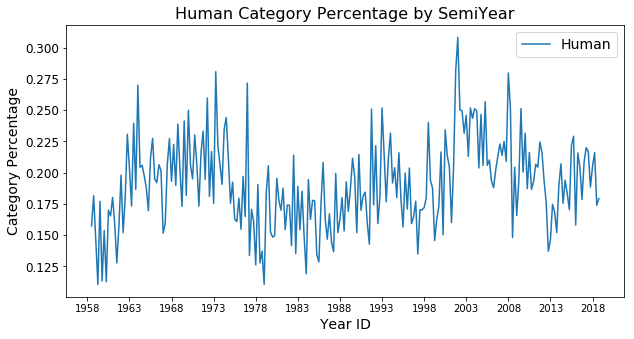

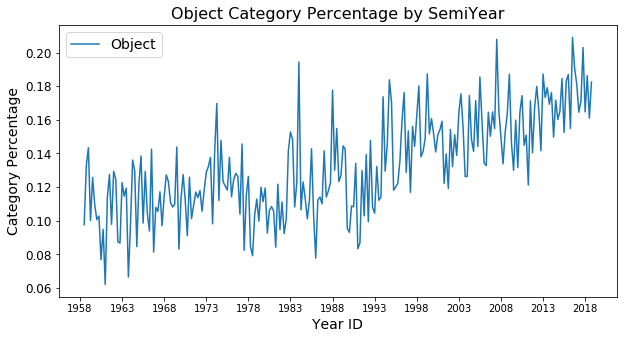

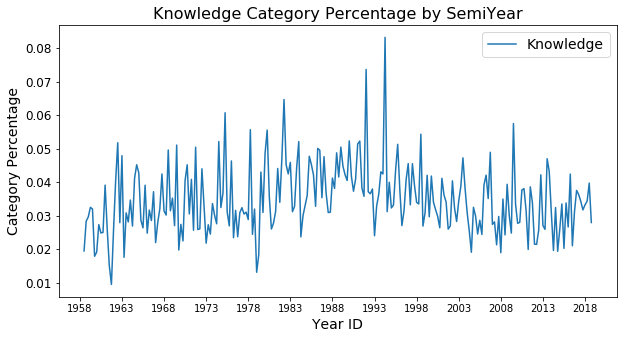

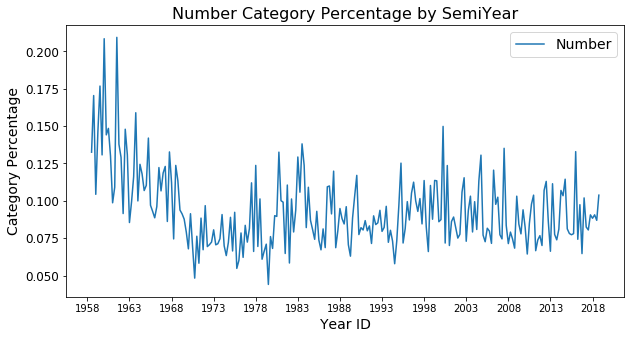

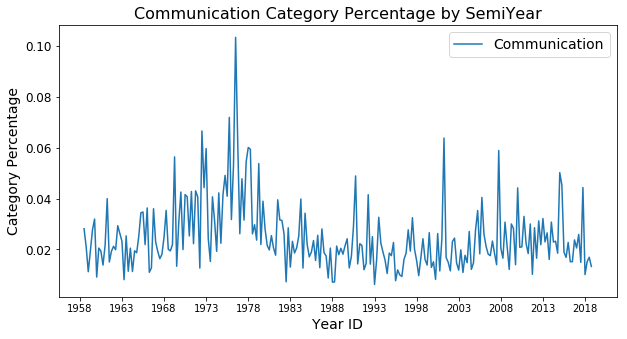

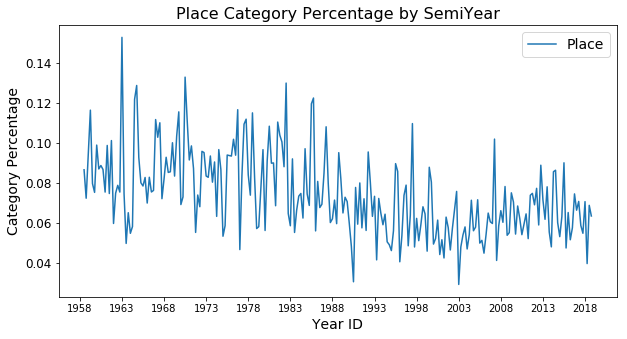

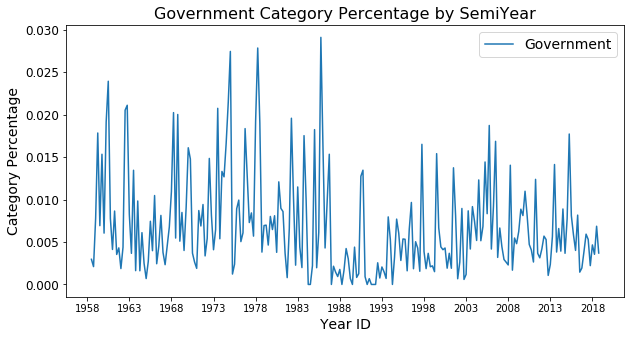

In [67]:
for k in categories:
    if k != "word_count":
        plt.figure(figsize=(10, 5))
        plt.plot(harvard_BB_SemiYear["QuarterID"],harvard_BB_SemiYear[k])
        plt.legend(fontsize=14)
        plt.title("{} Category Percentage by SemiYear".format(k), fontsize=16)
        plt.ylabel("Category Percentage", fontsize=14)
        plt.xlabel("Year ID", fontsize=14)
        plt.yticks(fontsize=12)
        plt.xticks(list(range(int(min(harvard_BB_SemiYear["SemiYearID"])), int(max(harvard_BB_SemiYear["SemiYearID"])) + 5, 5)))
        plt.show()

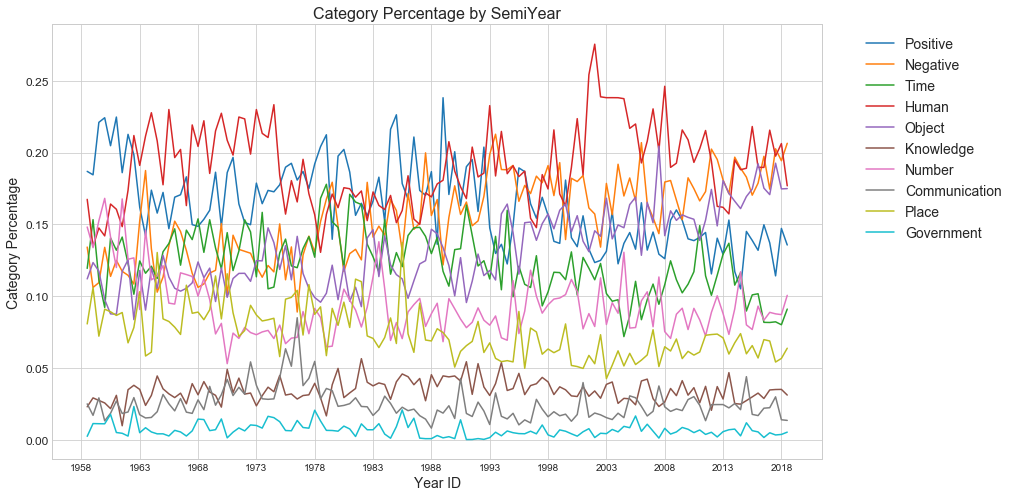

In [14]:
plt.figure(figsize=(13.8, 8))
sns.set_style("whitegrid")
for k in categories:
    if k != "word_count":
        plt.plot(harvard_BB_SemiYear["SemiYearID"],harvard_BB_SemiYear[k], label=k)
plt.legend(fontsize=14, bbox_to_anchor=(1.04,1))
plt.title("Category Percentage by SemiYear", fontsize=16)
plt.ylabel("Category Percentage", fontsize=14)
plt.xlabel("Year ID", fontsize=14)
plt.yticks(fontsize=12)
plt.xticks(list(range(int(min(harvard_BB_SemiYear["SemiYearID"])), int(max(harvard_BB_SemiYear["SemiYearID"])) + 5, 5)))
plt.show()

In [149]:
econ_master = pd.read_csv("../data/Econ/econ_master.csv")
econ_master = econ_master.drop("Unnamed: 0", axis=1)

In [150]:
econ_master.isna().agg({i: sum for i in econ.columns})

DATE                 0
Apparel              0
QuarterID            0
LoanRate            59
Food&Beverages      37
Fruits&Veggie        0
Gas                  8
Meats               37
MedicalCare          0
PersonalIncome       5
GDP                  1
HouseholdIncome    212
Housing              0
Unemployment         0
SemiYearID           0
dtype: int64

In [151]:
econ_master.head()

,DATE,Apparel,QuarterID,LoanRate,Food&Beverages,Fruits&Veggie,Gas,Meats,MedicalCare,PersonalIncome,GDP,HouseholdIncome,Housing,Unemployment,SemiYearID
0,1958-01-01,0.22405,1958.00,NaN,NaN,8.00493,-1.12518,NaN,1.16667,NaN,-10.0,NaN,0.44723,6.300000,1958.0
1,1958-04-01,0.00000,1958.25,NaN,NaN,3.07868,-0.71124,NaN,1.31796,NaN,2.7,NaN,0.44524,7.366667,1958.0
2,1958-07-01,-0.22355,1958.50,NaN,NaN,-5.19912,2.72206,NaN,1.30081,NaN,9.6,NaN,0.26596,7.333333,1958.5
3,1958-10-01,0.00000,1958.75,NaN,NaN,0.00000,-3.06834,NaN,1.28411,NaN,9.7,NaN,0.35367,6.366667,1958.5
4,1959-01-01,0.22405,1959.00,NaN,NaN,-1.28355,0.00000,NaN,0.79239,NaN,7.9,NaN,0.35242,5.833333,1959.0


In [173]:
econ_categories = list(set(econ_master.columns) - set(["QuarterID", "DATE", "SemiYearID", "LoanRate", "Food&Beverages", "Meats", "HouseholdIncome"]))

In [153]:
econ_categories

['Housing',
 'Unemployment',
 'Food&Beverages',
 'Apparel',
 'GDP',
 'PersonalIncome',
 'Gas',
 'MedicalCare']

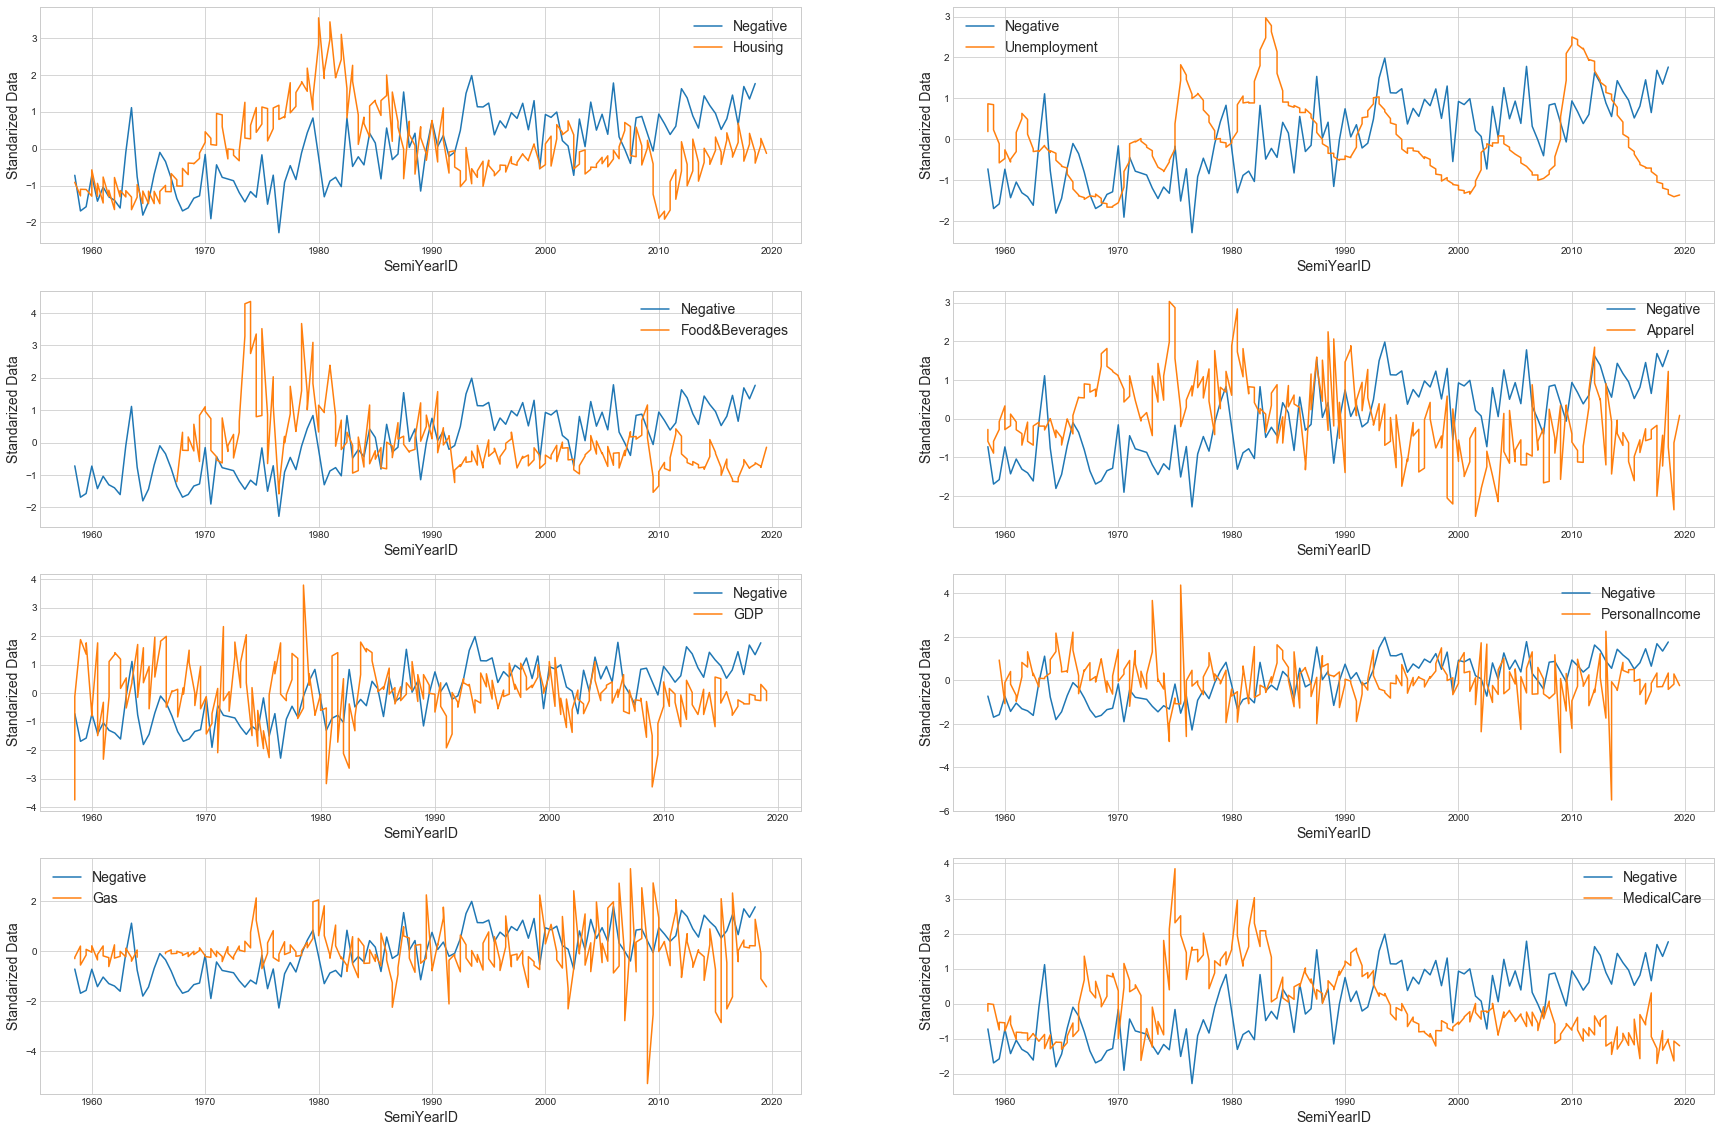

In [154]:
category_name = "Negative"
fig, ax = plt.subplots(2, 2, figsize=(30, 20))
sns.set_style("whitegrid")
for i in range(len(econ_categories)):
    ax = plt.subplot(len(econ_categories)//2, 2,i+1)
    data = harvard_BB_SemiYear[category_name]
    econ_data = econ_master[econ_categories[i]]
    plt.plot(harvard_BB_SemiYear["SemiYearID"], [(i - np.mean(data)) / np.std(data) for i in data], label=category_name)
    plt.plot([i+0.5 for i in econ_master["SemiYearID"]], [(i - np.mean(econ_data)) / np.std(econ_data) for i in econ_data], label=econ_categories[i])
    plt.legend(fontsize=14)
    plt.xlabel("SemiYearID", fontsize=14)
    plt.ylabel("Standarized Data", fontsize=14)


In [155]:
harvard_BB_SemiYear_percent = pd.DataFrame()
for c in categories:
    if c != 'word_count':
        harvard_BB_SemiYear_percent[c] = [(harvard_BB_SemiYear.loc[i, c] - harvard_BB_SemiYear.loc[i-1, c]) / harvard_BB_SemiYear.loc[i-1, c] 
                                     for i in range(1, harvard_BB_SemiYear.shape[0])]
harvard_BB_SemiYear_percent["SemiYearID"] = [harvard_BB_SemiYear.loc[i, 'SemiYearID'] for i in range(1, harvard_BB_SemiYear.shape[0])]

In [156]:
harvard_BB_Quarter_percent = pd.DataFrame()
for c in categories:
    if c != 'word_count':
        harvard_BB_Quarter_percent[c] = [(harvard_BB_Quarter.loc[i, c] - harvard_BB_Quarter.loc[i-1, c]) / harvard_BB_Quarter.loc[i-1, c] 
                                     for i in range(1, harvard_BB_Quarter.shape[0])]
harvard_BB_Quarter_percent["QuarterID"] = [harvard_BB_Quarter.loc[i, 'QuarterID'] for i in range(1, harvard_BB_Quarter.shape[0])]

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  """


In [157]:
harvard_BB_Quarter_percent.head()

,Positive,Negative,Time,Human,Object,Knowledge,Number,Communication,Place,Government,QuarterID
0,-0.267055,-0.240485,0.070846,0.153625,0.358320,0.455178,0.285904,-0.253028,-0.164198,-0.290376,1958.75
1,0.300800,-0.075053,0.282308,-0.199831,0.081698,0.045121,-0.387771,-0.467580,0.296328,2.726942,1959.00
2,-0.087946,0.046374,0.032310,-0.239257,-0.302573,0.096844,0.401415,0.754617,0.240638,1.278723,1959.25
3,-0.005450,-0.156433,-0.392366,0.601589,0.256643,-0.014865,0.208985,0.411409,-0.315561,-0.611863,1959.50
4,0.378043,0.423496,0.239983,-0.360355,-0.128000,-0.441334,-0.260559,0.153496,-0.054843,1.214712,1959.75


In [158]:
harvard_BB_SemiYear_percent.head()

,Positive,Negative,Time,Human,Object,Knowledge,Number,Communication,Place,Government,SemiYearID
0,-0.012885,-0.209110,0.283858,-0.195609,0.101280,0.268025,-0.096794,-0.316255,0.312079,3.406357,1959.0
1,0.197933,0.031402,-0.273366,0.095398,-0.048383,-0.061257,0.139488,0.705255,-0.318225,-0.008168,1959.5
2,0.014472,0.224255,-0.172027,-0.037382,-0.167989,-0.062287,0.102327,-0.543195,0.259843,-0.005997,1960.0
3,-0.086799,-0.150706,0.523978,0.156005,-0.101961,-0.153150,-0.159627,0.387158,-0.019828,0.579567,1960.5
4,0.097357,0.097638,-0.060524,-0.022120,-0.003214,0.422230,-0.150668,0.461114,-0.028507,-0.705661,1961.0


In [167]:
def get_time_elapse_heatmap(df, time_gran, time_elapsed, start_year, end_year):
    temp = df.copy()
    temp[time_gran] = [i+time_elapsed for i in temp[time_gran]]
    corr_matrix = temp[(temp[time_gran] < end_year) & (temp[time_gran] >= start_year)].merge(econ_master[econ_categories + [time_gran]], left_on=time_gran, right_on=time_gran, how="inner").drop(time_gran, axis=1)
    plt.figure(figsize=(40,20))
    sns.set(font_scale=1)
    a=sns.heatmap(corr_matrix.corr(), annot=True, fmt="g",cmap='viridis')
    
    

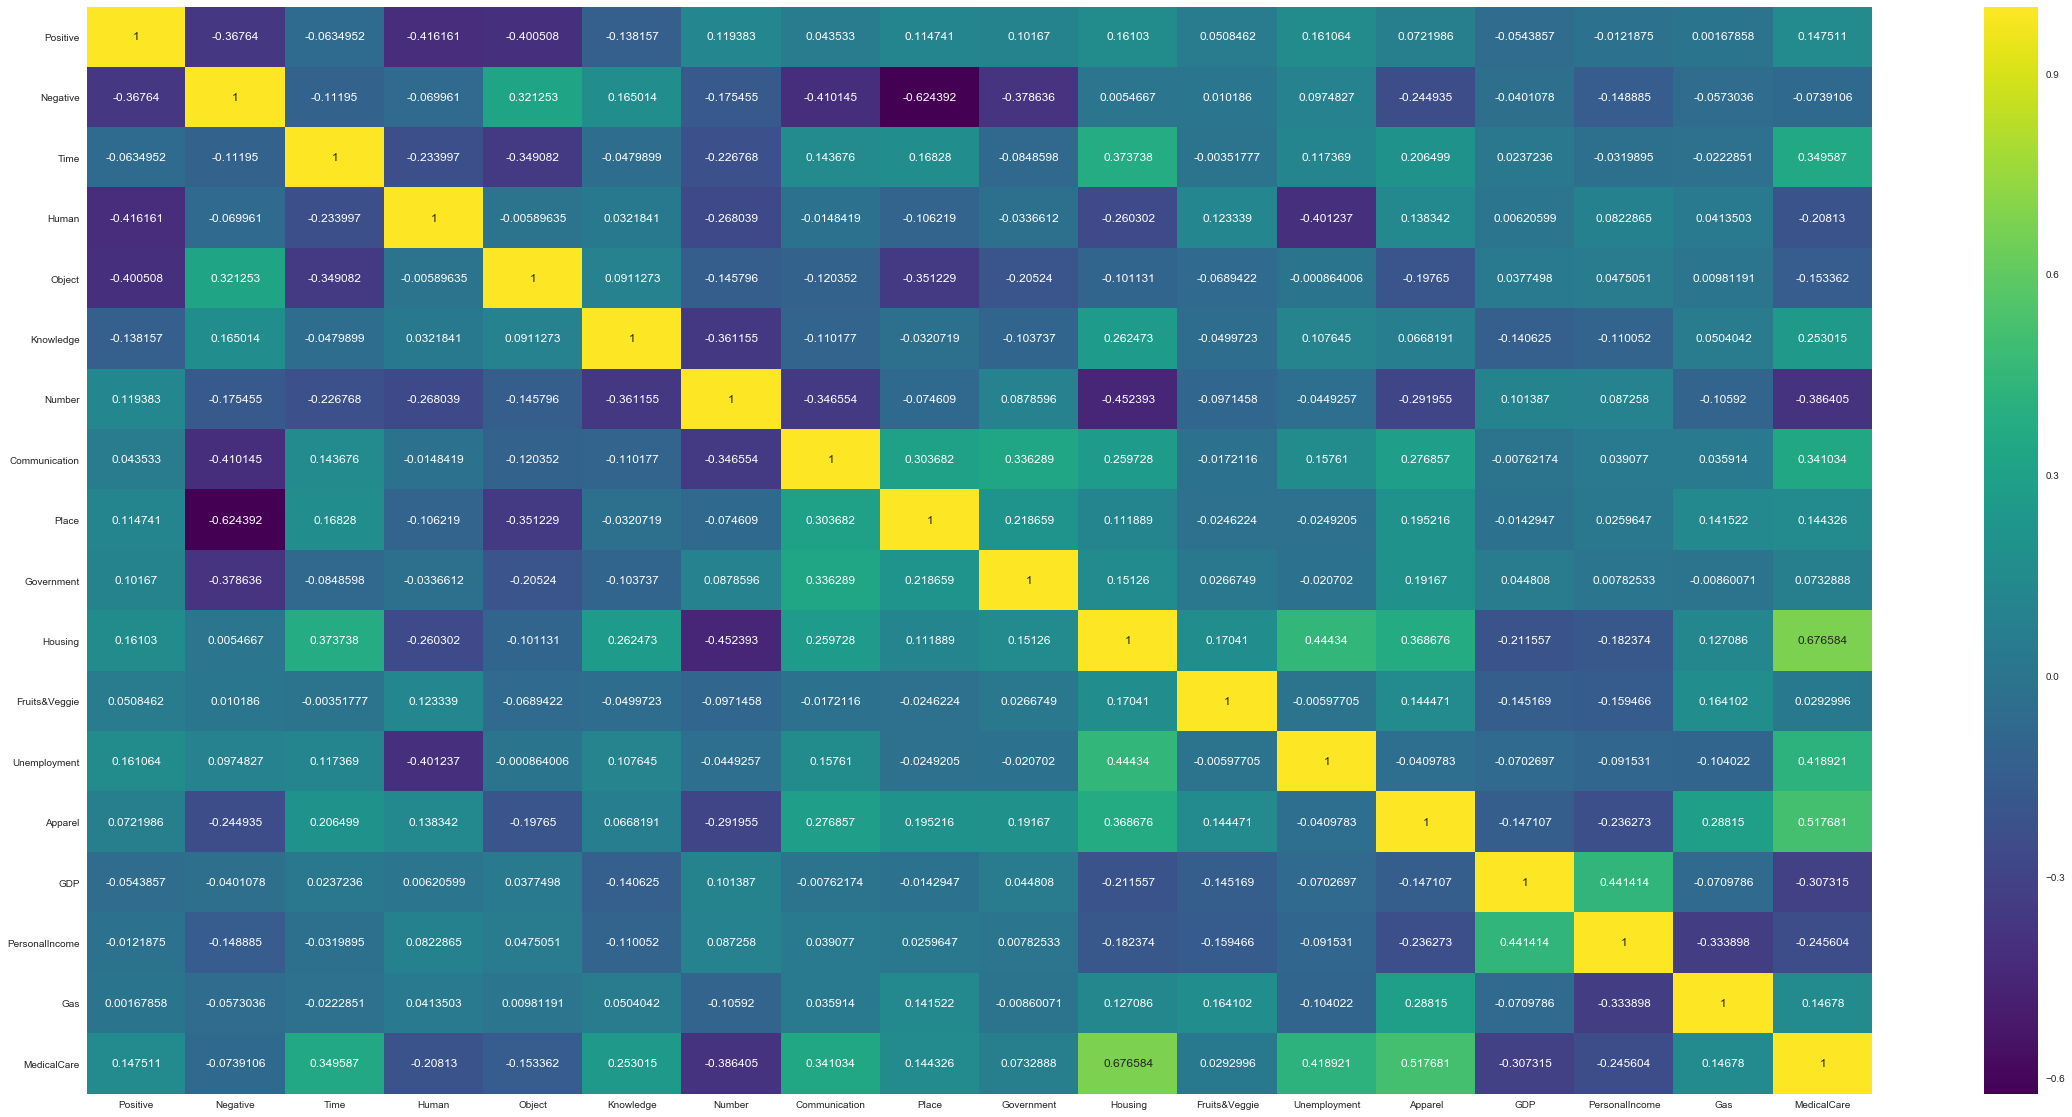

In [177]:
get_time_elapse_heatmap(harvard_BB_SemiYear, "SemiYearID", -0.5, 1958, 2000)

In [172]:
econ_categories

['Housing',
 'Unemployment',
 'Food&Beverages',
 'Apparel',
 'GDP',
 'PersonalIncome',
 'Gas',
 'MedicalCare']